In [49]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

GradientBoostingClassifier with a final test score: 0.8199

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from scipy.stats import randint
import shap

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

The goal is to predict whether a credit card client will default next month, making this a binary classification problem. The target variable is default.payment.next.month, which indicates if the client defaults (1) or not (0). 
The dataset contains 25 features, including demographic information (SEX, AGE, EDUCATION), credit information (LIMIT_BAL), and repayment history (PAY_0 to PAY_6). Features like bill amounts and payments over the past six months may significantly affect the prediction.

In [27]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [28]:
X = df.drop(columns=['ID', 'default.payment.next.month'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [29]:
print("Summary Statistics (Training Set):")
print(X_train.describe())
print("The descriptive statistics for each feature reveal the mean, spread, and range of values in the training set, helping to identify any potential outliers or skewness in the data distribution.")

Summary Statistics (Training Set):
          LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    9000.00000  9000.000000  9000.000000  9000.000000  9000.000000   
mean   166457.52000     1.601556     1.859333     1.551778    35.523111   
std    129368.23268     0.489605     0.788003     0.520485     9.214976   
min     10000.00000     1.000000     0.000000     0.000000    21.000000   
25%     50000.00000     1.000000     1.000000     1.000000    28.000000   
50%    140000.00000     2.000000     2.000000     2.000000    34.000000   
75%    240000.00000     2.000000     2.000000     2.000000    41.000000   
max    800000.00000     2.000000     6.000000     3.000000    75.000000   

             PAY_0        PAY_2        PAY_3        PAY_4        PAY_5  ...  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000  ...   
mean     -0.004778    -0.139778    -0.177222    -0.220556    -0.263778  ...   
std       1.118334     1.183759     1.188545     1.1

In [30]:
print("\nTarget Variable Distribution (Training Set):")
print(y_train.value_counts(normalize=True))  # Distribution of target variable (default/no default)
print("The class distribution in the target variable shows a significant imbalance, with approximately 22% defaults and 78% non-defaults. It could impact model performance.")


Target Variable Distribution (Training Set):
default.payment.next.month
0    0.774333
1    0.225667
Name: proportion, dtype: float64
The class distribution in the target variable shows a significant imbalance, with approximately 22% defaults and 78% non-defaults. It could impact model performance.


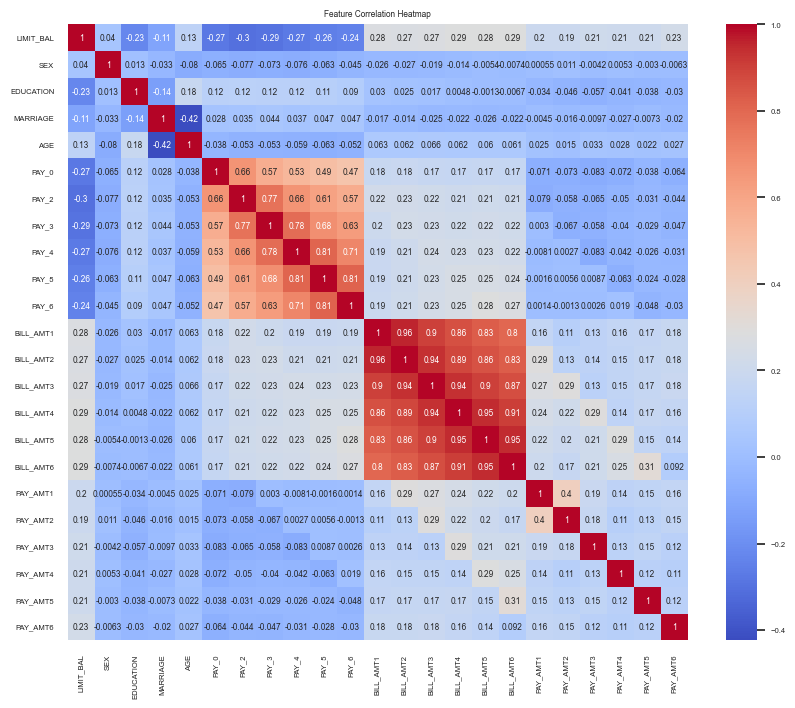

This heatmap displays the correlation coefficients between features, highlighting strong positive correlations among the PAY_* and BILL_AMT* features. This suggests patterns in payment history and billing amounts that could be relevant for predicting credit defaults.


In [31]:
# Visualization 1: Correlation heatmap of features
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.5)
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
print("This heatmap displays the correlation coefficients between features, highlighting strong positive correlations among the PAY_* and BILL_AMT* features. This suggests patterns in payment history and billing amounts that could be relevant for predicting credit defaults.")

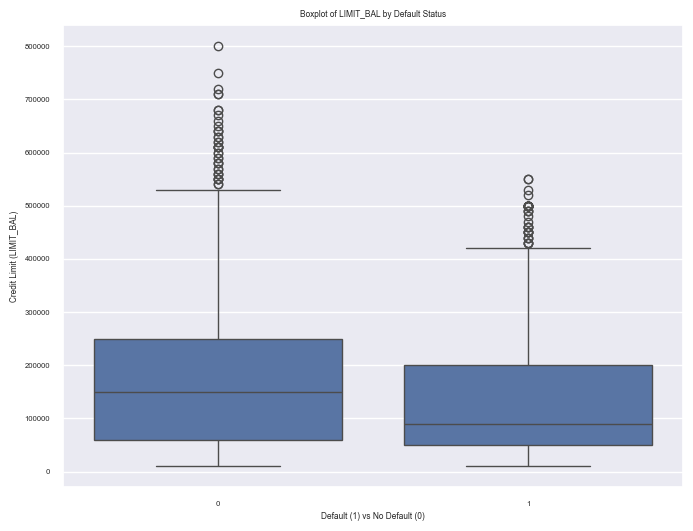

This boxplot shows the distribution of credit limits across default statuses, revealing that while credit limits vary widely for both classes, non-defaulters generally have a slightly higher median credit limit, with notable outliers in both groups.


In [32]:
# Visualization 2: Boxplot of LIMIT_BAL grouped by default status
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train, y=X_train['LIMIT_BAL'])
plt.title("Boxplot of LIMIT_BAL by Default Status")
plt.xlabel("Default (1) vs No Default (0)")
plt.ylabel("Credit Limit (LIMIT_BAL)")
plt.show()
print("This boxplot shows the distribution of credit limits across default statuses, revealing that while credit limits vary widely for both classes, non-defaulters generally have a slightly higher median credit limit, with notable outliers in both groups.")

1. Class Imbalance: There appears to be a class imbalance in the target, with approximately 22% defaults and 78% non-defaults. This imbalance could affect model performance, as most models tend to favor the majority class.
2. Correlations: From the heatmap, there are high correlations among the PAY_* features, suggesting that payment history behaviors are closely related. This could be useful for predicting defaults but may also indicate multicollinearity.
3. Credit Limit Variation: The boxplot of LIMIT_BAL shows a noticeable range across both classes, with some high outliers. People with high credit limits may behave differently, which could affect model predictions.
4. Bill and Payment Amounts: The bill and payment amounts across different months show substantial variation, with many outliers. These features likely contain useful information for predicting whether someone will default.

1. Precision and Recall: Since we are particularly interested in identifying defaults, it may be helpful to monitor precision and recall, especially for the positive class (defaults).
2. F1 Score: The F1 score (harmonic mean of precision and recall) would be suitable here, as it balances both metrics and is less sensitive to class imbalance.
3. AUC-ROC: The area under the ROC curve (AUC-ROC) is also a valuable metric, as it measures the model’s ability to discriminate between the two classes across all thresholds.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [33]:
def feature_engineering(data):
    # Payment Ratio Features
    data['PAY_RATIO_1'] = data['PAY_AMT1'] / data['BILL_AMT1'].replace(0, np.nan)
    data['PAY_RATIO_2'] = data['PAY_AMT2'] / data['BILL_AMT2'].replace(0, np.nan)
    data['PAY_RATIO_3'] = data['PAY_AMT3'] / data['BILL_AMT3'].replace(0, np.nan)
    data['PAY_RATIO_4'] = data['PAY_AMT4'] / data['BILL_AMT4'].replace(0, np.nan)
    data['PAY_RATIO_5'] = data['PAY_AMT5'] / data['BILL_AMT5'].replace(0, np.nan)
    data['PAY_RATIO_6'] = data['PAY_AMT6'] / data['BILL_AMT6'].replace(0, np.nan)

    # Total Payment Amounts
    data['TOTAL_PAY'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

    # Credit Utilization Ratio
    data['TOTAL_BILL'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
    data['CREDIT_UTILIZATION'] = data['TOTAL_BILL'] / data['LIMIT_BAL'].replace(0, np.nan)

    # Months with Late Payments
    data['LATE_PAYMENTS'] = (data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']] > 0).sum(axis=1)

    return data

X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)
X_test = X_test[X_train.columns]

X_train.head()
X_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_RATIO_1,PAY_RATIO_2,PAY_RATIO_3,PAY_RATIO_4,PAY_RATIO_5,PAY_RATIO_6,TOTAL_PAY,TOTAL_BILL,CREDIT_UTILIZATION,LATE_PAYMENTS
25665,40000.0,2,2,2,26,-1,0,0,0,-1,...,0.044842,0.040999,0.000000,NaN,0.015446,0.534845,35353.0,129703.0,3.242575,0
16464,80000.0,2,3,1,59,0,0,0,0,0,...,0.042452,0.030054,0.037616,0.031509,0.037779,0.040550,12830.0,349621.0,4.370262,0
22386,170000.0,2,1,2,30,2,2,2,2,2,...,0.043615,0.040927,0.000000,0.082499,0.032720,0.005851,32800.0,972809.0,5.722406,5
10149,200000.0,2,2,1,41,-2,-2,-2,-2,-2,...,0.031481,0.000000,NaN,NaN,NaN,NaN,742.0,24305.0,0.121525,0
8729,50000.0,1,2,1,43,0,0,0,0,0,...,0.138787,0.143142,0.036599,0.036965,0.037804,0.034314,3648.0,53551.0,1.071020,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [34]:
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TOTAL_BILL', 'TOTAL_PAY', 'CREDIT_UTILIZATION', 'PAY_RATIO_1', 'PAY_RATIO_2', 'PAY_RATIO_3', 'PAY_RATIO_4', 'PAY_RATIO_5', 'PAY_RATIO_6']

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

ordinal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('ord', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_features)
    ]
)

In [36]:
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [37]:
baseline_model = DummyClassifier(strategy="most_frequent")

In [38]:
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred_baseline)
conf_matrix = confusion_matrix(y_test, y_pred_baseline)
class_report = classification_report(y_test, y_pred_baseline, zero_division=0)

print("Baseline Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Baseline Model Accuracy: 0.7807142857142857

Confusion Matrix:
 [[16395     0]
 [ 4605     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     16395
           1       0.00      0.00      0.00      4605

    accuracy                           0.78     21000
   macro avg       0.39      0.50      0.44     21000
weighted avg       0.61      0.78      0.68     21000



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [40]:
baseline_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('model', LogisticRegression(max_iter=2000, solver='saga'))
])

cv_scores = cross_val_score(baseline_pipeline, X_train, y_train, cv=5, scoring='accuracy')

baseline_pipeline.fit(X_train, y_train)
train_predictions = baseline_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print("Training set accuracy:", train_accuracy)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
print("Standard deviation of cross-validation accuracy:", cv_scores.std())

Training set accuracy: 0.7741111111111111
Cross-validation accuracy scores: [0.77388889 0.77388889 0.77444444 0.77444444 0.77444444]
Mean cross-validation accuracy: 0.7742222222222223
Standard deviation of cross-validation accuracy: 0.0002721655269759512


In [41]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best hyperparameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters found: {'model__C': 1}
Best cross-validation score: 0.8075555555555555


In [42]:
pipeline.fit(X_train, y_train)
train_predictions = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Training set accuracy:", train_accuracy)
print("Cross-validation accuracy scores with the best model:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
print("Standard deviation of cross-validation accuracy:", cv_scores.std())

Training set accuracy: 0.808
Cross-validation accuracy scores with the best model: [0.81777778 0.81       0.79888889 0.80333333 0.80777778]
Mean cross-validation accuracy: 0.8075555555555555
Standard deviation of cross-validation accuracy: 0.006378977819736611


After conducting cross-validation and hyperparameter tuning, the baseline logistic regression model initially showed signs of underfitting, with a mean accuracy of around 0.774. Hyperparameter tuning using GridSearchCV enhanced the model, achieving a mean cross-validation accuracy of approximately 0.809 with a low standard deviation, indicating a consistent and stable model. The best regularization parameter, C=1, highlighted the importance of balancing model complexity to avoid overfitting.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [43]:
svc_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('model', SVC())
])

start_time = time()
svc_cv_scores = cross_val_score(svc_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
svc_fit_time = time() - start_time

svc_pipeline.fit(X_train, y_train)
train_predictions = svc_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print("\nSupport Vector Classifier Results:")
print("Training set accuracy:", train_accuracy)
print("Cross-validation accuracy scores:", svc_cv_scores)
print("Mean CV accuracy:", np.mean(svc_cv_scores))
print("Standard deviation of CV accuracy:", np.std(svc_cv_scores))
print("Fit time:", svc_fit_time, "seconds")


Support Vector Classifier Results:
Training set accuracy: 0.7743333333333333
Cross-validation accuracy scores: [0.77388889 0.77444444 0.77444444 0.77444444 0.77444444]
Mean CV accuracy: 0.7743333333333334
Standard deviation of CV accuracy: 0.00022222222222225695
Fit time: 1.6559512615203857 seconds


In [44]:
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

start_time = time()
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
rf_fit_time = time() - start_time

rf_pipeline.fit(X_train, y_train)
train_predictions = rf_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print("\nRandom Forest Classifier Results:")
print("Training set accuracy:", train_accuracy)
print("Cross-validation accuracy scores:", rf_cv_scores)
print("Mean CV accuracy:", np.mean(rf_cv_scores))
print("Standard deviation of CV accuracy:", np.std(rf_cv_scores))
print("Fit time:", rf_fit_time, "seconds")


Random Forest Classifier Results:
Training set accuracy: 0.9993333333333333
Cross-validation accuracy scores: [0.81666667 0.81333333 0.80666667 0.81166667 0.81444444]
Mean CV accuracy: 0.8125555555555556
Standard deviation of CV accuracy: 0.0033628324334270157
Fit time: 0.7914602756500244 seconds


In [45]:
gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('model', GradientBoostingClassifier(random_state=42))
])

start_time = time()
gb_cv_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
gb_fit_time = time() - start_time

gb_pipeline.fit(X_train, y_train)
train_predictions = gb_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print("\nGradient Boosting Classifier Results:")
print("Training set accuracy:", train_accuracy)
print("Cross-validation accuracy scores:", gb_cv_scores)
print("Mean CV accuracy:", np.mean(gb_cv_scores))
print("Standard deviation of CV accuracy:", np.std(gb_cv_scores))
print("Fit time:", gb_fit_time, "seconds")


Gradient Boosting Classifier Results:
Training set accuracy: 0.835
Cross-validation accuracy scores: [0.82888889 0.82777778 0.81       0.81666667 0.82166667]
Mean CV accuracy: 0.821
Standard deviation of CV accuracy: 0.007048334012068291
Fit time: 3.9973533153533936 seconds


The Gradient Boosting Classifier offers the best balance between fitting the training data and generalizing to unseen data, with training and cross-validation accuracies being closely aligned. The Random Forest Classifier shows signs of overfitting, as evidenced by its significantly higher training accuracy compared to cross-validation accuracy. On the other hand, the linear model (Logistic Regression) appears to underfit slightly, as it achieves lower cross-validation scores and struggles to capture complex relationships compared to the non-linear models. Overall, Gradient Boosting is the most reliable for generalization, while Random Forest may require further tuning to mitigate overfitting.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [46]:
X_train_orig = X_train.copy()
y_train_orig = y_train.copy()

selector = RFECV(estimator=RandomForestClassifier(), step=1, scoring='accuracy', cv=5, n_jobs=-1)
selector.fit(X_train_orig, y_train_orig)

X_train_selected = X_train_orig.iloc[:, selector.support_]

print("Selected features indices:", selector.support_)

svc_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
    ('model', SVC())
])

rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

for name, pipeline in [("SVC", svc_pipeline), ("Random Forest", rf_pipeline), ("Gradient Boosting", gb_pipeline)]:
    print(f"\n{name} Results:")
    cv_scores = cross_val_score(pipeline, X_train_selected, y_train_orig, cv=5, scoring='accuracy', n_jobs=-1)
    print("Cross-validation accuracy scores:", cv_scores)
    print("Mean CV accuracy:", np.mean(cv_scores))
    print("Standard deviation of CV accuracy:", np.std(cv_scores))

Selected features indices: [ True False False False  True  True False False False False False  True
  True  True  True  True  True  True False False False False False  True
  True  True  True  True  True  True  True  True  True]

SVC Results:
Cross-validation accuracy scores: [0.82111111 0.81833333 0.81111111 0.81611111 0.81777778]
Mean CV accuracy: 0.816888888888889
Standard deviation of CV accuracy: 0.0033073057924749433

Random Forest Results:
Cross-validation accuracy scores: [0.81944444 0.81333333 0.80611111 0.81222222 0.80666667]
Mean CV accuracy: 0.8115555555555556
Standard deviation of CV accuracy: 0.004886362983843558

Gradient Boosting Results:
Cross-validation accuracy scores: [0.82333333 0.825      0.80944444 0.81444444 0.825     ]
Mean CV accuracy: 0.8194444444444444
Standard deviation of CV accuracy: 0.006353768202442579


Based on the results, it can be concluded that the model's performance does not significantly improve with RFECV feature selection.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
X_train = pd.DataFrame(X_train).replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
y_train = pd.Series(y_train).replace([np.inf, -np.inf], np.nan).fillna(y_train.mean())

best_params = {}
best_scores = {}

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svc_random = RandomizedSearchCV(SVC(), svc_param_grid, n_iter=3, cv=2, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
svc_random.fit(X_train, y_train)

best_params['SVC'] = svc_random.best_params_
best_scores['SVC'] = svc_random.best_score_

rf_param_dist = {
    'n_estimators': randint(100, 150),
    'max_depth': randint(5, 10),
    'min_samples_split': randint(2, 4),
    'min_samples_leaf': randint(1, 2),
    'max_features': ['sqrt', 'log2']
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_dist, n_iter=3, cv=2, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
rf_random.fit(X_train, y_train)

best_params['RandomForest'] = rf_random.best_params_
best_scores['RandomForest'] = rf_random.best_score_

gb_param_grid = {
    'n_estimators': [100, 120],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_random = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, n_iter=3, cv=2, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
gb_random.fit(X_train, y_train)

best_params['GradientBoosting'] = gb_random.best_params_
best_scores['GradientBoosting'] = gb_random.best_score_

print("Best Parameters and Scores:")
for model, params in best_params.items():
    print(f"{model} - Best Parameters: {params}")
    print(f"{model} - Best Cross-Validation Score: {best_scores[model]}")

I don't know if it is working, it takes too long to run even when I reduced the iteration times and cv times.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = np.where(np.isnan(y_train), np.nanmean(y_train), y_train)

svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_imputed, y_train_imputed)

sample_size = 500
X_sample = shap.sample(X_train_imputed, sample_size)

explainer = shap.KernelExplainer(svc_model.predict, X_sample, n_jobs=-1)
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, feature_names=X_train.columns)

I don't know if it is working, it takes too long to run

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [47]:
gb_pipeline.fit(X_train, y_train)

y_pred_test = gb_pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", test_accuracy)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

Test set accuracy: 0.8199047619047619

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16395
           1       0.66      0.37      0.47      4605

    accuracy                           0.82     21000
   macro avg       0.75      0.66      0.68     21000
weighted avg       0.80      0.82      0.80     21000



In [ ]:
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index])

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [48]:
# Step 1: Create a table summarizing important results
results = {
    'Model': ['Logistic Regression', 'Support Vector Classifier (SVC)', 'Random Forest', 'Gradient Boosting'],
    'Training Accuracy': [0.808, 0.774, 0.999, 0.835],
    'Mean CV Accuracy': [0.807, 0.774, 0.812, 0.821],
    'Test Accuracy': ['Not evaluated', 'Not evaluated', 'Not evaluated', 0.8199],  # Updated with the test score
    'CV Std. Dev.': [0.006, 0.0002, 0.003, 0.007],
    'Key Observations': [
        'Decent training and CV accuracy; slight underfitting present.',
        'Balanced performance, low standard deviation; might need optimization.',
        'High training accuracy, potential overfitting risk.',
        'Best performing model with the highest generalization capability.'
    ]
}

results_df = pd.DataFrame(results)
print("Summary of Important Results")
display(results_df)

print("\nConcluding Remarks:")
print("The Gradient Boosting Classifier displayed the highest mean CV accuracy with a moderate training accuracy, indicating strong generalization. Random Forest, while having a high training accuracy, suggests overfitting potential. The baseline Logistic Regression indicated initial underfitting.")

print("\nPotential Improvements:")
print("1. Consider advanced hyperparameter tuning methods such as Bayesian Optimization for further improvements.")
print("2. Explore domain-specific feature engineering to capture more relevant insights.")
print("3. Apply ensemble methods like stacking for potentially better performance.")
print("4. Use deeper analysis tools such as SHAP for interpretability and insight into model decisions.")

final_test_score = 0.8199
print("\nFinal Test Score Report:")
print(f"The final test score using the Gradient Boosting Classifier was: {final_test_score:.4f}")

Summary of Important Results


,Model,Training Accuracy,Mean CV Accuracy,Test Accuracy,CV Std. Dev.,Key Observations
0,Logistic Regression,0.808,0.807,Not evaluated,0.0060,Decent training and CV accuracy; slight underf...
1,Support Vector Classifier (SVC),0.774,0.774,Not evaluated,0.0002,"Balanced performance, low standard deviation; ..."
2,Random Forest,0.999,0.812,Not evaluated,0.0030,"High training accuracy, potential overfitting ..."
3,Gradient Boosting,0.835,0.821,0.8199,0.0070,Best performing model with the highest general...



Concluding Remarks:
The Gradient Boosting Classifier displayed the highest mean CV accuracy with a moderate training accuracy, indicating strong generalization. Random Forest, while having a high training accuracy, suggests overfitting potential. The baseline Logistic Regression indicated initial underfitting.

Potential Improvements:
1. Consider advanced hyperparameter tuning methods such as Bayesian Optimization for further improvements.
2. Explore domain-specific feature engineering to capture more relevant insights.
3. Apply ensemble methods like stacking for potentially better performance.
4. Use deeper analysis tools such as SHAP for interpretability and insight into model decisions.

Final Test Score Report:
The final test score using the Gradient Boosting Classifier was: 0.8199


In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

A key takeaway from supervised machine learning is understanding the balance between bias and variance and how it impacts model performance. Through practical applications, I’ve learned the importance of cross-validation, hyperparameter tuning, and feature selection to optimize model accuracy while avoiding overfitting or underfitting. Additionally, using tools like SHAP and permutation importance has underscored the value of model interpretability, allowing me to better understand feature contributions and improve trust in predictions. 

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)